In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install -q ultralytics albumentations opencv-python tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.3 MB/s eta 0:00:00a 0:00:01


In [3]:
!pip install ultralytics --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.8.4 requires fastcore<1.9,>=1.8.0, but you have fastcore 1.11.3 which is incompatible.


In [4]:
import os
import yaml
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import yaml
from tqdm import tqdm

sns.set_theme(style="darkgrid", font="SimHei", rc={"axes.unicode_minus":False})

import torch
from ultralytics import YOLO

from PIL import Image

seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
model = YOLO("yolo26n.pt")

In [6]:
config = {
    "path": "/kaggle/input/the-drug-name-detection-dataset",
    "train": "/kaggle/input/the-drug-name-detection-dataset/train",
    "val": "/kaggle/input/the-drug-name-detection-dataset/valid",
    "test": "/kaggle/input/the-drug-name-detection-dataset/test",
    "nc": 1,
    "names": ["drug-name"],
}

with open("data.yaml", "w") as file:
    yaml.dump(config, file, default_flow_style=False)

In [8]:
import os

train_img = "/kaggle/input/the-drug-name-detection-dataset/train/images"
train_lbl = "/kaggle/input/the-drug-name-detection-dataset/train/labels"

print("Train images:", len(os.listdir(train_img)))
print("Train labels:", len(os.listdir(train_lbl)))

Train images: 1276
Train labels: 1276


In [9]:
import yaml

hyp = {
    "hsv_h": 0.015,
    "hsv_s": 0.7,
    "hsv_v": 0.4,
    "degrees": 10,
    "translate": 0.1,
    "scale": 0.5,
    "shear": 2.0,
    "mosaic": 1.0,
    "mixup": 0.2,
    "copy_paste": 0.3
}

with open("hyp.yaml", "w") as f:
    yaml.dump(hyp, f)

print("✅ hyp.yaml ready")

✅ hyp.yaml ready


In [11]:
!yolo detect train \
  model=yolo26n.pt \
  data=data.yaml \
  epochs=40 \
  imgsz=640 \
  batch=16 \
  optimizer=AdamW \
  lr0=0.001 \
  freeze=10 \
  hsv_h=0.015 \
  hsv_s=0.7 \
  hsv_v=0.4 \
  degrees=10 \
  translate=0.1 \
  scale=0.5 \
  shear=2.0 \
  mosaic=1.0 \
  mixup=0.2 \
  copy_paste=0.3 \
  project=drug-detection \
  name=yolo26n_phase1

Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.3, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolo26n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolo26n_phase1, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

In [13]:
!yolo detect train \
  model=/kaggle/working/runs/detect/drug-detection/yolo26n_phase1/weights/best.pt \
  data=data.yaml \
  epochs=80 \
  imgsz=640 \
  batch=16 \
  optimizer=AdamW \
  lr0=0.0005 \
  cos_lr=True \
  hsv_h=0.015 \
  hsv_s=0.7 \
  hsv_v=0.4 \
  degrees=10 \
  translate=0.1 \
  scale=0.5 \
  shear=2.0 \
  mosaic=1.0 \
  mixup=0.2 \
  copy_paste=0.3 \
  project=drug-detection \
  name=yolo26n_phase2

Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.3, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=data.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=/kaggle/working/runs/detect/drug-detection/yolo26n_phase1/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolo26n_phase2, nbs=64, nms=False, opset=None, optimize=False, optimizer=

In [14]:
!yolo detect val \
  model=/kaggle/working/runs/detect/drug-detection/yolo26n_phase2/weights/best.pt \
  data=data.yaml \
  imgsz=640 \
  batch=16

Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO26n summary (fused): 122 layers, 2,375,031 parameters, 0 gradients, 5.2 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.1 ms, read: 63.1±22.3 MB/s, size: 37.1 KB)
val: Scanning /kaggle/input/the-drug-name-detection-dataset/valid/labels... 365 images, 2 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 365/365 575.0it/s 0.6s0.1s
WARNING ⚠️ val: Cache directory /kaggle/input/the-drug-name-detection-dataset/valid is not writable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 44, len(boxes) = 364. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 23/23 6.2it/s 3.7s0.1s
                   all        365        364      0.642      0.673      0.67

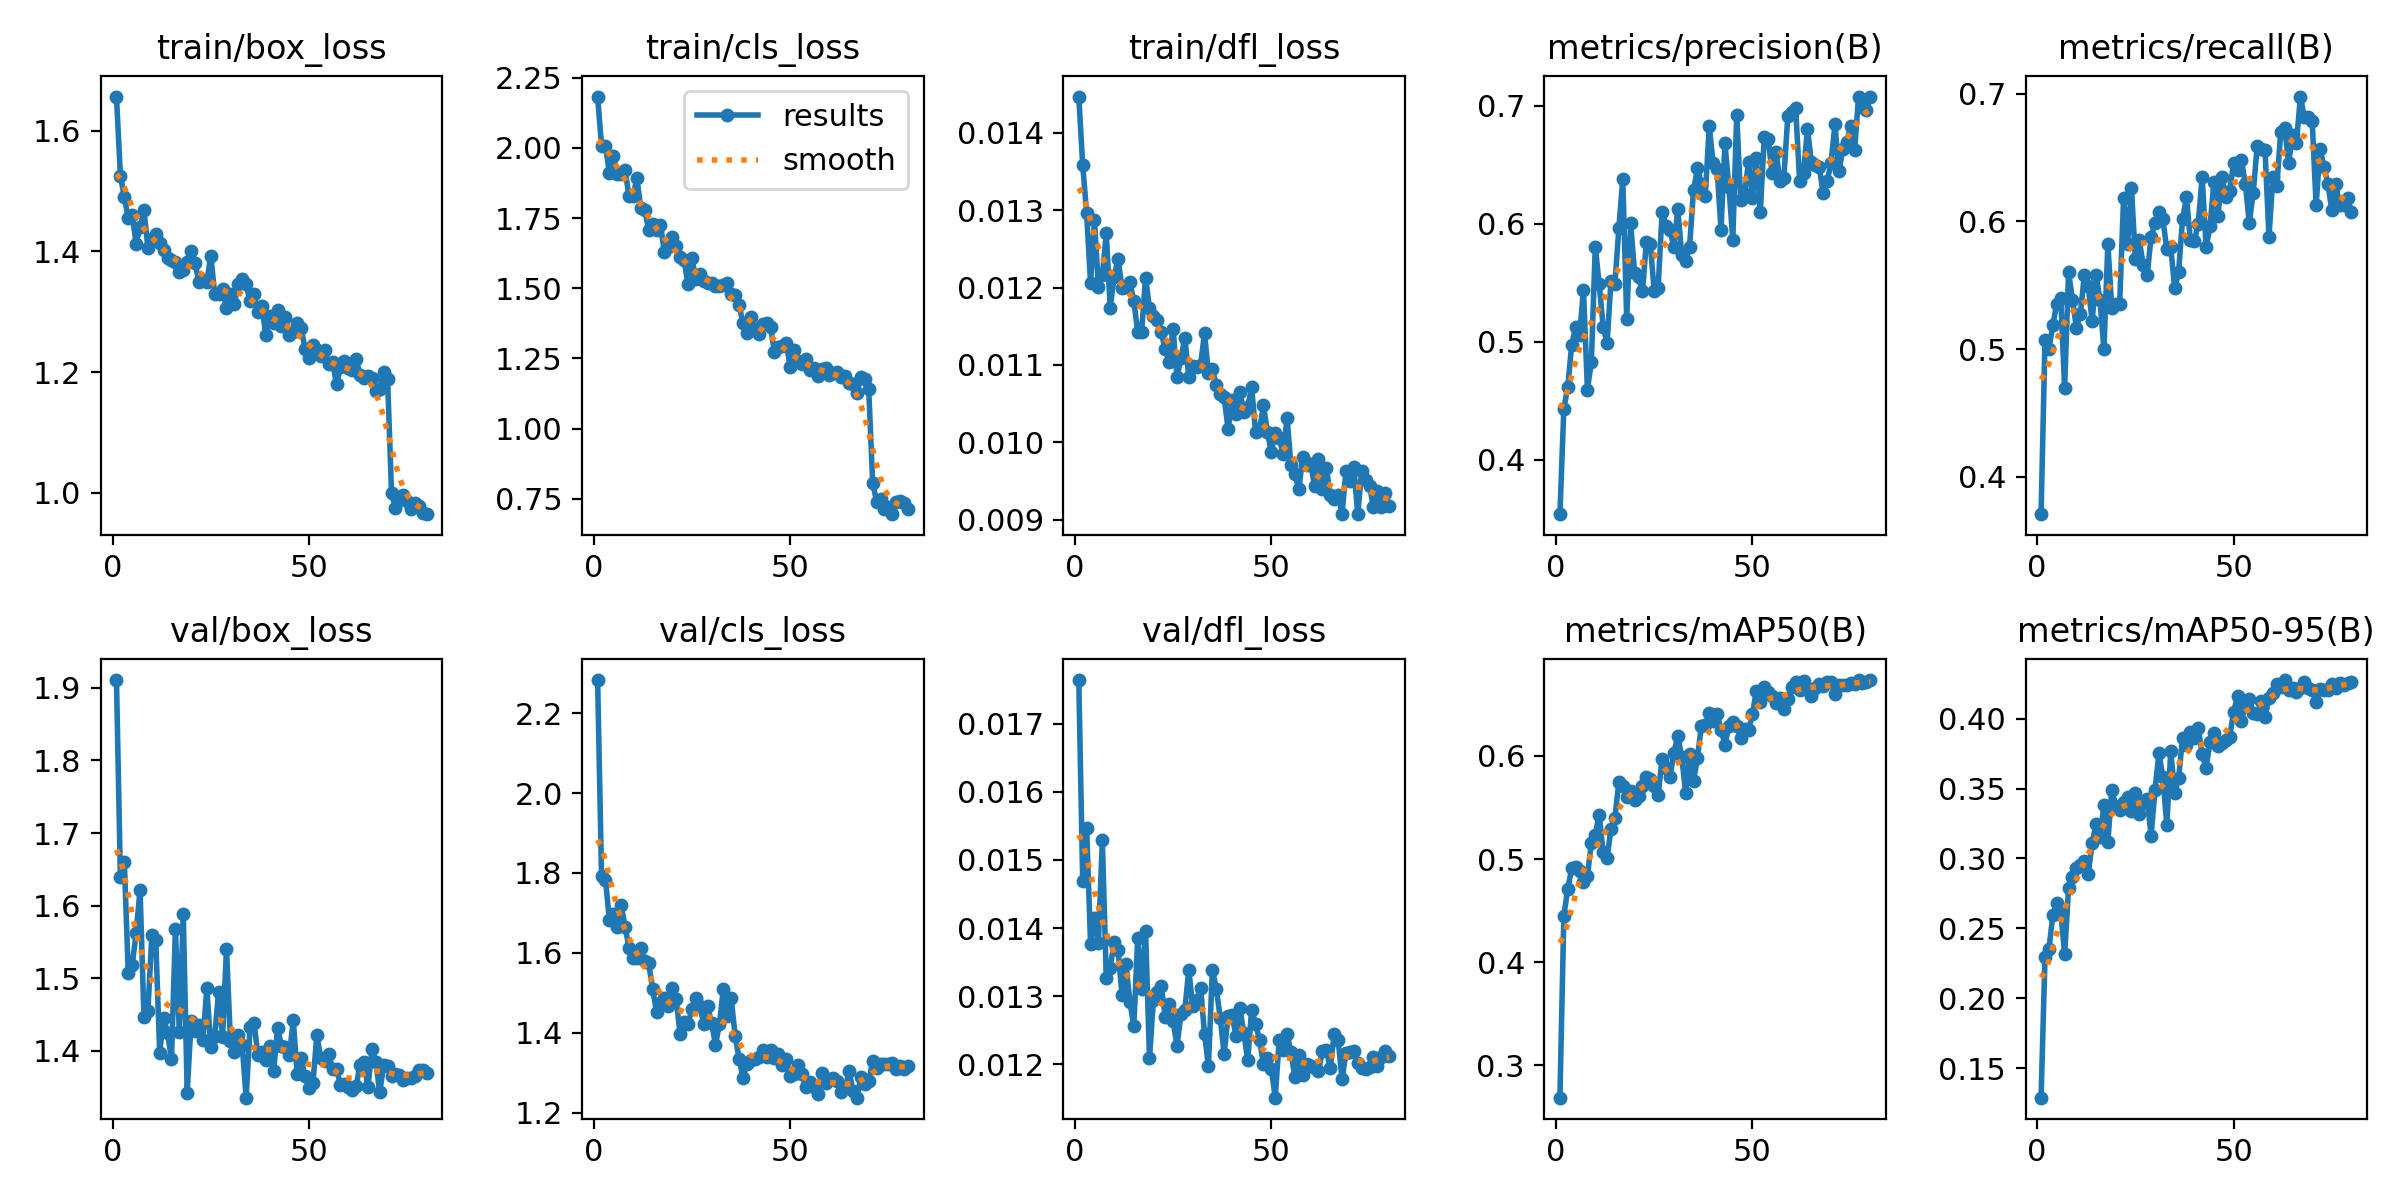

In [15]:
Image.open("/kaggle/working/runs/detect/drug-detection/yolo26n_phase2/results.png")

In [16]:
from ultralytics import YOLO

model = YOLO("/kaggle/working/runs/detect/drug-detection/yolo26n_phase2/weights/best.pt")

model.predict(
    source="/kaggle/input/the-drug-name-detection-dataset/test/images",
    conf=0.3,
    save=True
)


image 1/182 /kaggle/input/the-drug-name-detection-dataset/test/images/20230812_210244_jpg.rf.a2373a15c967eb6a157295e74fc71f45.jpg: 640x640 (no detections), 13.0ms
image 2/182 /kaggle/input/the-drug-name-detection-dataset/test/images/20230812_210441_jpg.rf.304261eeea390228fdd99f23079290aa.jpg: 640x640 1 drug-name, 10.8ms
image 3/182 /kaggle/input/the-drug-name-detection-dataset/test/images/20230812_213537_jpg.rf.ca0e0d0d8c6190258312e46cca65d229.jpg: 640x640 1 drug-name, 10.6ms
image 4/182 /kaggle/input/the-drug-name-detection-dataset/test/images/20230812_214043_jpg.rf.0df6b253cf09bd47d9ffd72f8158b5d6.jpg: 640x640 (no detections), 9.8ms
image 5/182 /kaggle/input/the-drug-name-detection-dataset/test/images/20230812_215836_jpg.rf.c9608220426c128e75c907d143f77f9a.jpg: 640x640 (no detections), 9.5ms
image 6/182 /kaggle/input/the-drug-name-detection-dataset/test/images/20230812_215916_jpg.rf.73cc868bb2038044a6820f8607aae04e.jpg: 640x640 (no detections), 9.8ms
image 7/182 /kaggle/input/the-dr

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'drug-name'}
 obb: None
 orig_img: array([[[186, 189, 194],
         [186, 189, 194],
         [186, 189, 194],
         ...,
         [181, 184, 198],
         [181, 184, 198],
         [181, 184, 198]],
 
        [[186, 189, 194],
         [186, 189, 194],
         [187, 190, 195],
         ...,
         [181, 184, 198],
         [181, 184, 198],
         [181, 184, 198]],
 
        [[186, 189, 194],
         [187, 190, 195],
         [187, 190, 195],
         ...,
         [181, 184, 198],
         [181, 184, 198],
         [181, 184, 198]],
 
        ...,
 
        [[176, 180, 181],
         [176, 180, 181],
         [176, 180, 181],
         ...,
         [114, 124, 141],
         [114, 124, 141],
         [114, 124, 141]],
 
        [[176, 180, 181],
         [176, 180, 181],
         [176, 180, 181],
         ...,
         [114, 

findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not

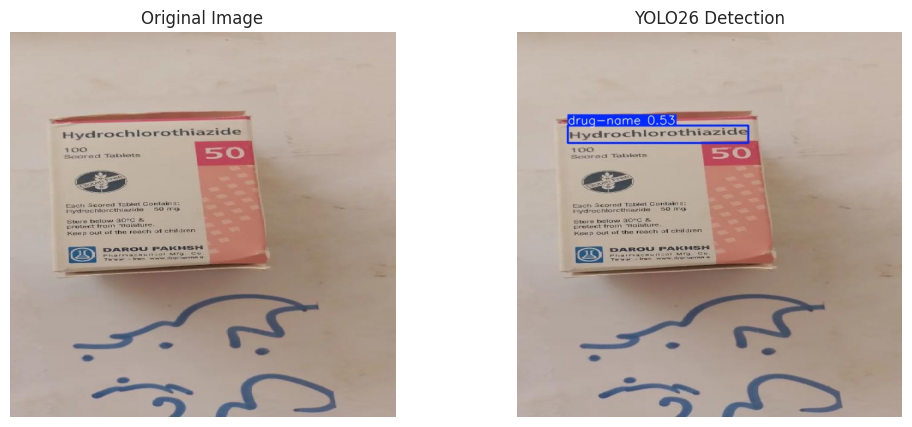

In [18]:
import cv2
import matplotlib.pyplot as plt

img_before = cv2.imread("/kaggle/input/the-drug-name-detection-dataset/test/images/8UkSWuWsWhIyjFXkWuecOnAbJjg_jpg.rf.c1298115a03dc5fded34edc264ebb144.jpg")
img_after = cv2.imread("/kaggle/working/runs/detect/predict/8UkSWuWsWhIyjFXkWuecOnAbJjg_jpg.rf.c1298115a03dc5fded34edc264ebb144.jpg")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img_before, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1,2,2)
plt.title("YOLO26 Detection")
plt.imshow(cv2.cvtColor(img_after, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()